In [2]:
import numpy as np
datasetDistReward = np.load('../outputs/datasetDistReward.npy')
print(datasetDistReward.shape)

x = datasetDistReward[:,:2]
y = datasetDistReward[:,2]

(524, 3)


In [98]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.01,shuffle=True)

## K-Means Clustering

In [99]:
#Use KMeans functions and fit the training data

#Training the algorithm with training data:
clustering = KMeans(n_clusters=2, random_state=5)
clustering.fit(x_train)

#Predicting the labels of the training data:
y_kmeans = clustering.predict(x)

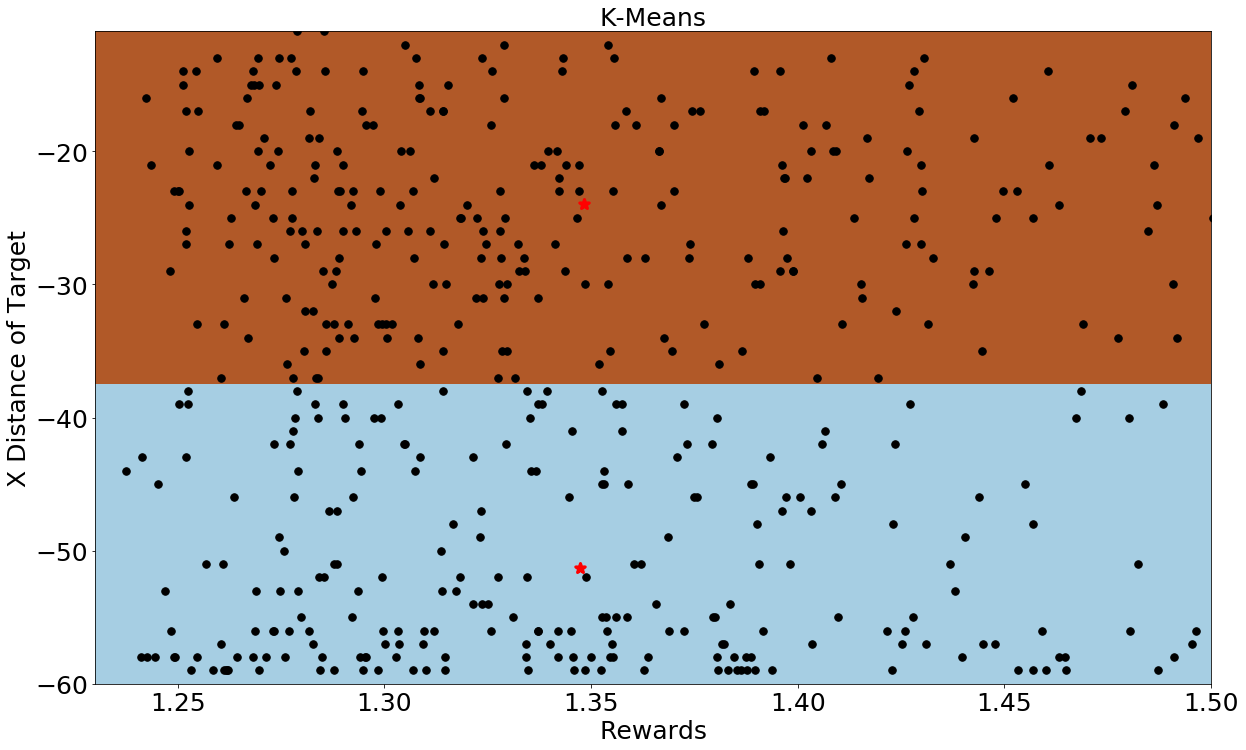

In [100]:
#Commands to plot the decision boundaries using np.meshgrid (only training datapoints)
plt.figure(figsize=(20,12))
h = 1
x_min, x_max = x_train[:, 0].min() - 1, x_train[:, 0].max() + 1
y_min, y_max = x_train[:, 1].min() - 1, x_train[:, 1].max() + 1
X, Y = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = clustering.predict(np.c_[X.ravel(), Y.ravel()])

Z = Z.reshape(X.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',extent=(X.min(), X.max(), Y.min(), Y.max()),cmap=plt.cm.Paired,aspect='auto', 
           origin='lower')


Z = Z.reshape(X.shape)
plt.plot(x_train[:, 0], x_train[:, 1], 'k.', markersize=15)
centers = clustering.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], marker='*', s=100, linewidths=3, color='r', zorder=10)

#Titles and Labels
plt.title('K-Means', fontsize=25)
plt.xlabel('Rewards', fontsize=25)
plt.ylabel('X Distance of Target', fontsize=25)
plt.xticks(fontsize=25, rotation=0)
plt.yticks(fontsize=25, rotation=0)
plt.xlim(1.23,1.5)
#plt.legend(('Dist b/w Box and Gripper', 'Dist b/w Box and Goal','isGrab?','Reward: ',reward), prop={'size': 25})

plt.show()

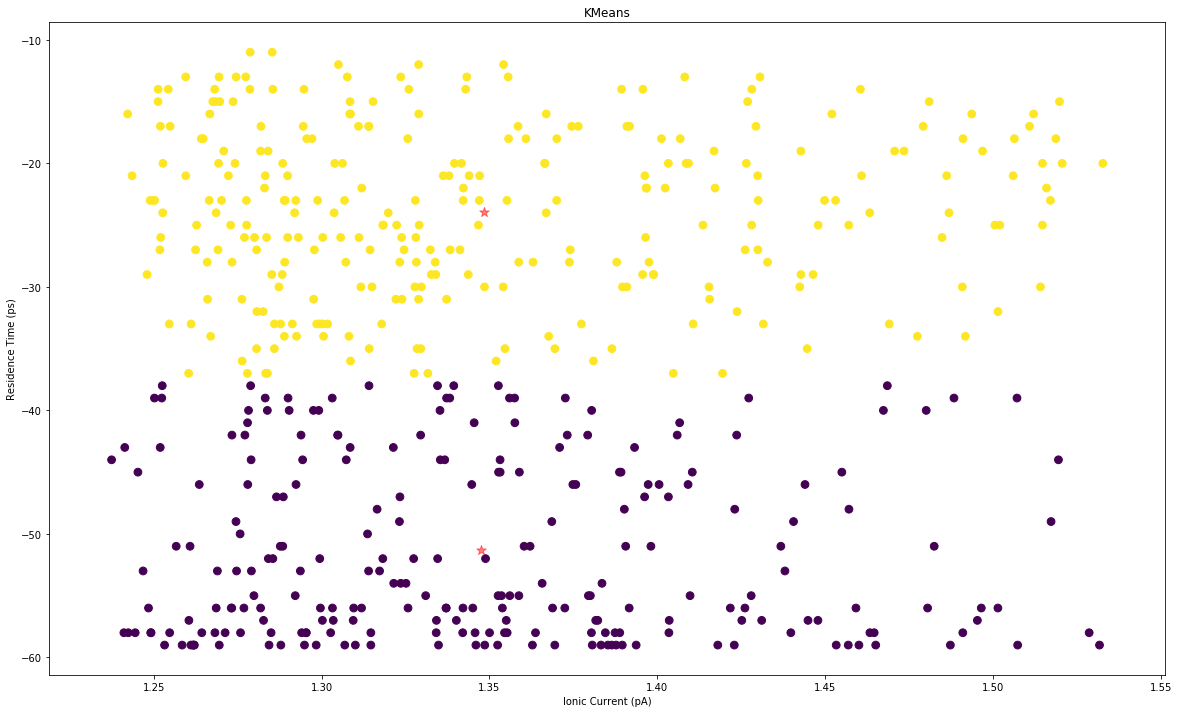

In [101]:
#Commands to plot the centroids of the clusters (all datapoints)
plt.figure(figsize=(20,12))
plt.scatter(x[:, 0], x[:, 1], c=y_kmeans, s=60)
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=100, marker='*', alpha=0.5);

plt.title('KMeans')
plt.xlabel('Ionic Current (pA)')
plt.ylabel('Residence Time (ps)')
plt.show()

## K-Nearest Neighbors

In [102]:
from sklearn.neighbors import KNeighborsClassifier

#Training the algorithm with training data:
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)

#Predicting the labels of the train data:
pred_train = knn.predict(x_train)

#Reporting the score with default neighbors (5):
print('Training Data:')
print("Accuracy with default neighbors= ",accuracy_score(y_train, pred_train)*100,'%')

#Predicting the labels of the test data:
pred = knn.predict(x_test)

#Reporting the score with default neighbors (5):
print('\n','Testing Data:')
print("Accuracy with default neighbors= ",accuracy_score(y_test, pred)*100,'%')

Training Data:
Accuracy with default neighbors=  82.04633204633205 %

 Testing Data:
Accuracy with default neighbors=  66.66666666666666 %


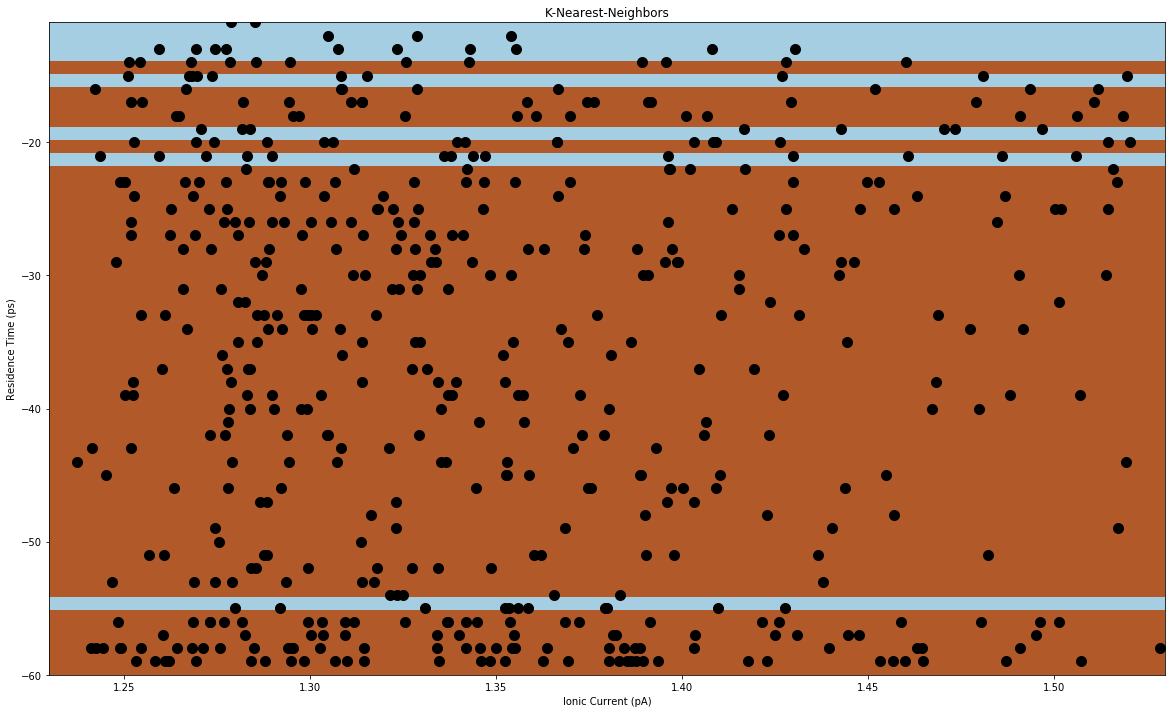

In [103]:
#Plotting the decision boundaries:
plt.figure(figsize=(20,12))
h = 1
x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1
X, Y = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = knn.predict(np.c_[X.ravel(), Y.ravel()])
Z = Z.reshape(X.shape)

plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',extent=(X.min(), X.max(), Y.min(), Y.max()),cmap=plt.cm.Paired,aspect='auto', 
           origin='lower')


Z = Z.reshape(X.shape)
plt.plot(x[:, 0], x[:, 1], 'k.', markersize=20)

plt.title('K-Nearest-Neighbors')
plt.xlabel('Ionic Current (pA)')
plt.xlim(1.23,1.53)
plt.ylabel('Residence Time (ps)')
plt.show()

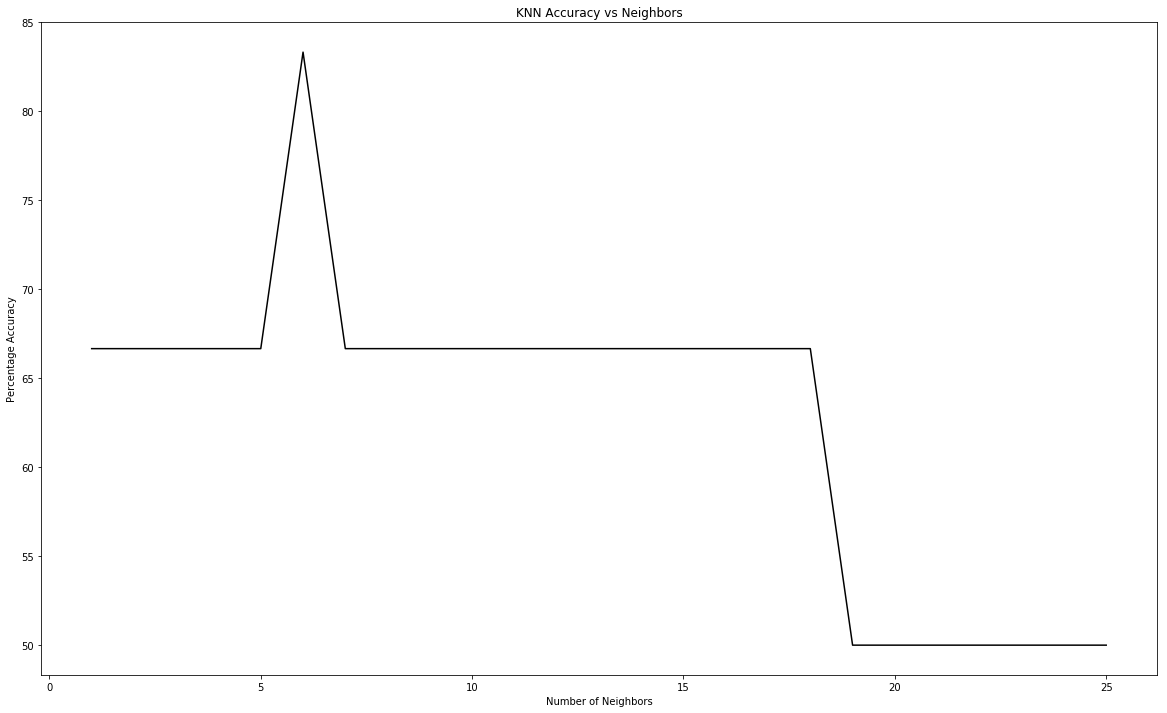

In [104]:
#Plot of Percentage Accuracy vs Number of Neighbors:
plt.figure(figsize=(20,12))
neighbors1 = []
accuracy1 = []
for i in range(1,26):
    knn1 = KNeighborsClassifier(n_neighbors=i)
    knn1.fit(x_train,y_train)
    pred1 = knn1.predict(x_test)
    neighbors1.append(i)
    accuracy1.append(accuracy_score(y_test,pred1)*100)

plt.plot(neighbors1,accuracy1,'k')
plt.title('KNN Accuracy vs Neighbors')
plt.xlabel("Number of Neighbors")
plt.ylabel('Percentage Accuracy')
plt.show()

## Random Forest Clustering

In [105]:
from sklearn.ensemble import RandomForestClassifier

#Training of data
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

#Calculating the accuracy of training t data
predrf_train = rf.predict(x_train)
accuracyrf_train = accuracy_score(y_train, predrf_train)

#Print accuracy report
print('Training Data:')
print("Accuracy with Default Estimators= ", accuracyrf_train*100,"%")

#Predicting the accuracy of test data
predrf = rf.predict(x_test)
accuracyrf = accuracy_score(y_test, predrf)

#Print accuracy report
print('\n','Test Data:')
print("Accuracy with Default Estimators= ", accuracyrf*100,"%")

Training Data:
Accuracy with Default Estimators=  99.03474903474904 %

 Test Data:
Accuracy with Default Estimators=  66.66666666666666 %


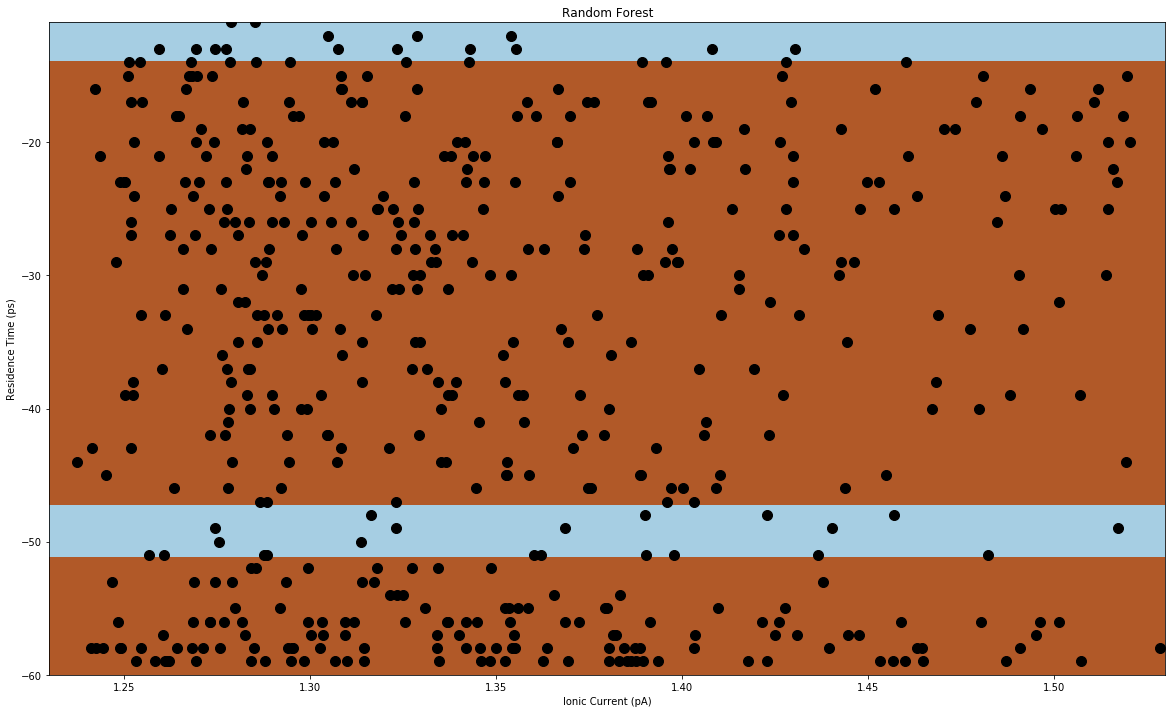

In [106]:
#Plotting the decision boundaries:

plt.figure(figsize=(20,12))


h = 1
x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1
X, Y = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = rf.predict(np.c_[X.ravel(), Y.ravel()])
Z = Z.reshape(X.shape)

plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',extent=(X.min(), X.max(), Y.min(), Y.max()),cmap=plt.cm.Paired,aspect='auto', 
           origin='lower')


Z = Z.reshape(X.shape)
plt.plot(x[:, 0], x[:, 1], 'k.', markersize=20)

plt.title('Random Forest')
plt.xlabel('Ionic Current (pA)')
plt.ylabel('Residence Time (ps)')
plt.xlim(1.23,1.53)
plt.show()

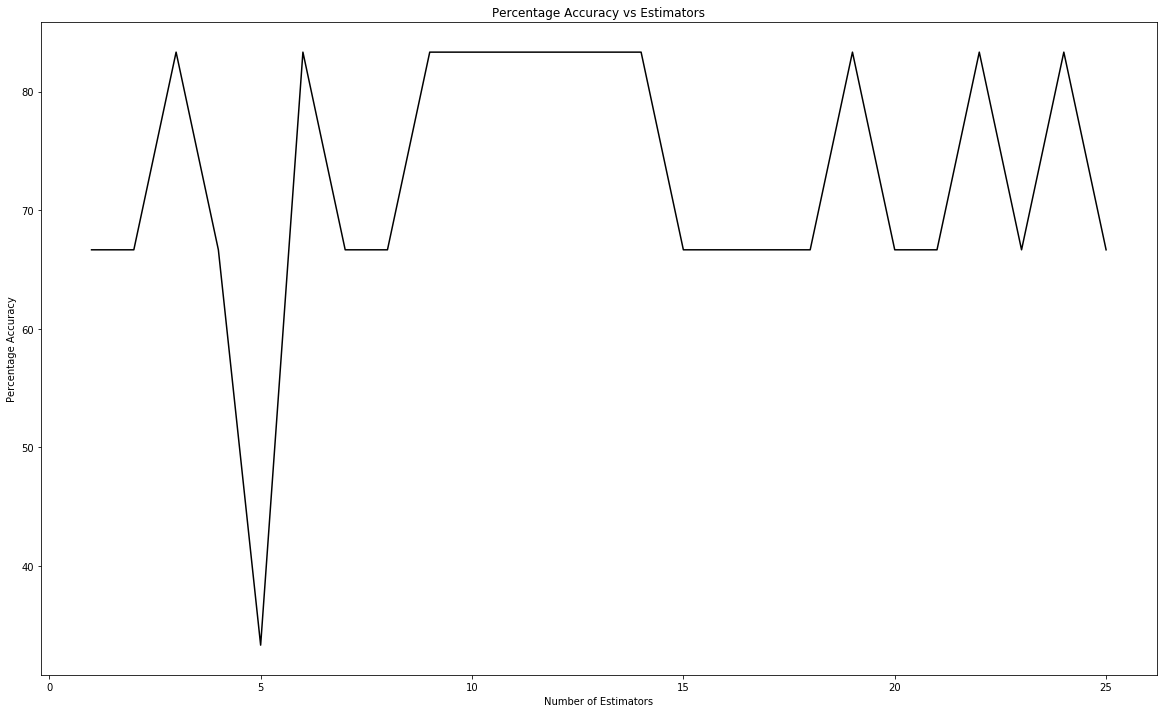

In [107]:
#Plot of Percentage Accuracy vs Number of Estimators:
plt.figure(figsize=(20,12))

estimators2 = []
accuracy2 = []
for i in range(1,26):
    rf2 = RandomForestClassifier(n_estimators=i)
    rf2.fit(x_train,y_train)
    pred2 = rf2.predict(x_test)
    estimators2.append(i)
    accuracy2.append(accuracy_score(y_test,pred2)*100)

    
plt.plot(estimators2,accuracy2,'k')
plt.title('Percentage Accuracy vs Estimators')
plt.xlabel("Number of Estimators")
plt.ylabel('Percentage Accuracy')
plt.show()

## Logistic Regression

In [108]:
from sklearn.linear_model import LogisticRegression

#Training data
lr = LogisticRegression()
lr.fit(x_train, y_train)

#Predict accuracy on training data:
predlr_train = lr.predict(x_train)
accuracylr_train = accuracy_score(y_train, predlr_train)

#Reporting Accuracy
print('Training Data:')
print("Accuracy with Default Settings= ", accuracylr_train*100,"%")

#Testing data
predlr = lr.predict(x_test)
accuracylr = accuracy_score(y_test, predlr)

#Reporting Accuracy
print('\n','Testing Data:')
print("Accuracy with Default Settings= ", accuracylr*100,"%")

Training Data:
Accuracy with Default Settings=  71.04247104247105 %

 Testing Data:
Accuracy with Default Settings=  50.0 %


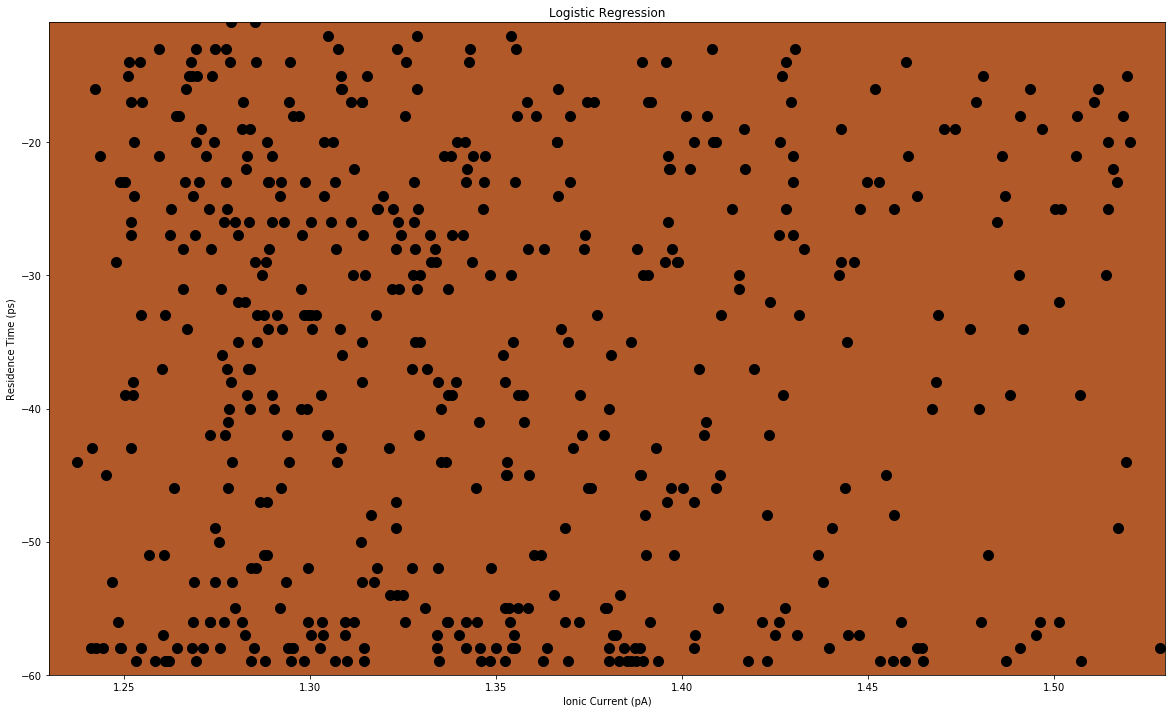

In [109]:
#Plotting the decision boundaries:
plt.figure(figsize=(20,12))


h = 1
# x_min, x_max = x_train[:, 0].min() - 1, x_train[:, 0].max() + 1
# y_min, y_max = x_train[:, 1].min() - 1, x_train[:, 1].max() + 1

x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1

X, Y = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = lr.predict(np.c_[X.ravel(), Y.ravel()])
Z = Z.reshape(X.shape)

plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',extent=(X.min(), X.max(), Y.min(), Y.max()),cmap=plt.cm.Paired,aspect='auto', 
           origin='lower')


Z = Z.reshape(X.shape)
plt.plot(x[:, 0], x[:, 1], 'k.', markersize=20)

plt.title('Logistic Regression')
plt.xlabel('Ionic Current (pA)')
plt.ylabel('Residence Time (ps)')
plt.xlim(1.23,1.53)
plt.show()

In [110]:
aa = np.load('boxXYZgoalXYZ.npy')

In [111]:
print(aa)

[[1.07767788 0.70664303 0.36473541 1.39568948 0.82030484 0.36469864]
 [1.06525978 0.83368884 0.36473541 1.29475706 0.89143523 0.36469864]
 [1.06599466 0.84645342 0.36473541 1.38932752 0.85117451 0.36469864]
 [1.06993669 0.8256223  0.36473541 1.27867821 0.64933961 0.36469864]
 [1.0829283  0.6851218  0.36473541 1.26948258 0.62091723 0.36469864]
 [1.06613117 0.84015751 0.36473541 1.30501838 0.76847847 0.36469864]
 [1.07902251 0.70964282 0.36473541 1.35556584 0.62567416 0.36469864]
 [1.08247462 0.7194573  0.36473541 1.35420159 0.60734953 0.36469864]
 [1.05468512 0.65102545 0.36473541 1.32357053 0.62276759 0.36469864]
 [1.07145179 0.8091312  0.36473541 1.40812441 0.78632087 0.36469864]
 [1.0726801  0.68901811 0.36473541 1.28532317 0.70112262 0.36469864]
 [1.07020073 0.67255825 0.36473541 1.4281024  0.66064173 0.36469864]
 [1.08502052 0.84004904 0.36473541 1.25955655 0.7814694  0.36469864]
 [1.08279811 0.83109749 0.36473541 1.27743558 0.72146954 0.36469864]
 [1.07726169 0.69809357 0.36473541

In [123]:

print(x.shape)
print(y.shape)

(524, 2)
(524,)


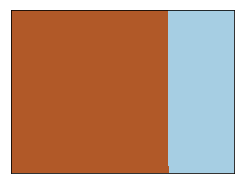

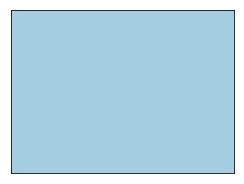

In [127]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

# we create 40 separable points
np.random.seed(0)

# figure number
fignum = 1

# fit the model
for name, penalty in (('unreg', 1), ('reg', 0.05)):

    clf = svm.SVC(kernel='linear', C=penalty)
    clf.fit(x, y)

    # get the separating hyperplane
    w = clf.coef_[0]
    a = -w[0] / w[1]
    xx = np.linspace(-1, 1)
    yy = a * xx - (clf.intercept_[0]) / w[1]

    # plot the parallels to the separating hyperplane that pass through the
    # support vectors (margin away from hyperplane in direction
    # perpendicular to hyperplane). This is sqrt(1+a^2) away vertically in
    # 2-d.
    margin = 1 / np.sqrt(np.sum(clf.coef_ ** 2))
    yy_down = yy - np.sqrt(1 + a ** 2) * margin
    yy_up = yy + np.sqrt(1 + a ** 2) * margin

    # plot the line, the points, and the nearest vectors to the plane
    plt.figure(fignum, figsize=(4, 3))
    plt.clf()
    plt.plot(xx, yy, 'k-')
    plt.plot(xx, yy_down, 'k--')
    plt.plot(xx, yy_up, 'k--')

    plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=80,
                facecolors='none', zorder=10)
    plt.scatter(X[:, 0], X[:, 1], zorder=10, cmap=plt.cm.Paired)

    plt.axis('tight')
    x_min = -4.8
    x_max = 4.2
    y_min = -6
    y_max = 6

    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
    Z = clf.predict(np.c_[XX.ravel(), YY.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(XX.shape)
    plt.figure(fignum, figsize=(4, 3))
    plt.pcolormesh(XX, YY, Z, cmap=plt.cm.Paired)

    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)

    plt.xticks(())
    plt.yticks(())
    fignum = fignum + 1

plt.show()

In [121]:
datasetDistReward = np.load('datasetDistReward.npy')
print(datasetDistReward.shape)

X = datasetDistReward[:,:2]
y = datasetDistReward[:,2]
print(X.shape, y.shape)

(524, 3)
(524, 2) (524,)


ValueError: x and y must be the same size

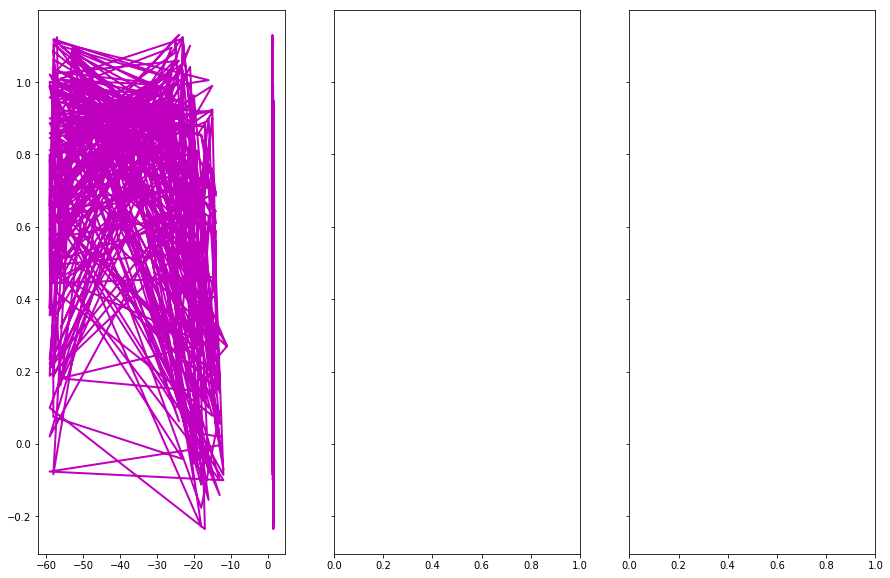

In [122]:
import numpy as np
from sklearn.svm import SVR
import matplotlib.pyplot as plt

# #############################################################################
# Fit regression model
svr_rbf = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)
svr_lin = SVR(kernel='linear', C=100, gamma='auto')
svr_poly = SVR(kernel='poly', C=100, gamma='auto', degree=3, epsilon=.1,
               coef0=1)
y_rbf = svr_rbf.fit(X, y).predict(X)
y_lin = svr_lin.fit(X, y).predict(X)
y_poly = svr_poly.fit(X, y).predict(X)

# #############################################################################
# Look at the results
lw = 2

svrs = [svr_rbf, svr_lin, svr_poly]
kernel_label = ['RBF', 'Linear', 'Polynomial']
model_color = ['m', 'c', 'g']

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 10), sharey=True)
for ix, svr in enumerate(svrs):
    axes[ix].plot(X, svr.fit(X, y).predict(X), color=model_color[ix], lw=lw,
                  label='{} model'.format(kernel_label[ix]))
    axes[ix].scatter(X[svr.support_], y[svr.support_], facecolor="none",
                     edgecolor=model_color[ix], s=50,
                     label='{} support vectors'.format(kernel_label[ix]))
    axes[ix].scatter(X[np.setdiff1d(np.arange(len(X)), svr.support_)],
                     y[np.setdiff1d(np.arange(len(X)), svr.support_)],
                     facecolor="none", edgecolor="k", s=50,
                     label='other training data')
    axes[ix].legend(loc='upper center', bbox_to_anchor=(0.5, 1.1),
                    ncol=1, fancybox=True, shadow=True)

fig.text(0.5, 0.04, 'data', ha='center', va='center')
fig.text(0.06, 0.5, 'target', ha='center', va='center', rotation='vertical')
fig.suptitle("Support Vector Regression", fontsize=14)
plt.show()